# Vegetable Data Building

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [4]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/Veg-dataset/Veg-dataset/train_set",target_size=(128,128), class_mode='categorical',batch_size=24)

Found 726 images belonging to 9 classes.


In [6]:
x_test=test_datagen.flow_from_directory(r'/content/drive/MyDrive/Veg-dataset/Veg-dataset/test_set',target_size=(128,128),class_mode='categorical',batch_size=24)

Found 0 images belonging to 9 classes.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [8]:
model=Sequential()

In [9]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
model.add(Flatten())

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [14]:
model.add(Dense(9,activation='softmax'))

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
len(x_train)

31

In [17]:
1238/24

51.583333333333336

In [18]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
31/31 [==============================] - 208s 7s/step - loss: 0.0741 - accuracy: 0.9669
Epoch 2/10
31/31 [==============================] - 13s 417ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/10
31/31 [==============================] - 14s 448ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
31/31 [==============================] - 13s 409ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
31/31 [==============================] - 12s 375ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
31/31 [==============================] - 13s 432ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
31/31 [==============================] - 13s 409ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
31/31 [==============================] - 12s 396ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
31/31 [==============================] - 13s 414ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
31/31 [==============================] - 13s 420m

In [19]:
model.save('vegetabledata.h5')

In [20]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:
model=load_model('vegetabledata.h5')

In [61]:
img=image.load_img(r"/content/d1dfc5c2-9605-419b-826f-58691f793758___JR_Sept.L.S 2674.JPG")

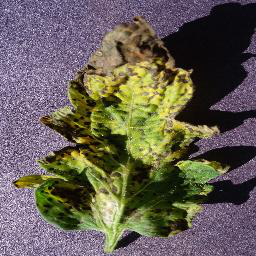

In [62]:
img

In [40]:
x=image.img_to_array(img)

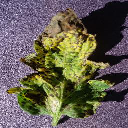

In [63]:
img=image.load_img(r"/content/d1dfc5c2-9605-419b-826f-58691f793758___JR_Sept.L.S 2674.JPG",target_size=(128,128))
img

In [64]:
x=image.img_to_array(img)

In [65]:
x

array([[[130., 120., 154.],
        [ 66.,  56.,  90.],
        [ 79.,  69., 103.],
        ...,
        [ 79.,  67.,  91.],
        [ 97.,  85., 109.],
        [ 79.,  67.,  91.]],

       [[105.,  95., 129.],
        [ 91.,  81., 115.],
        [110., 100., 134.],
        ...,
        [  8.,   0.,  20.],
        [  9.,   0.,  21.],
        [ 10.,   1.,  22.]],

       [[100.,  90., 124.],
        [ 42.,  32.,  66.],
        [131., 121., 155.],
        ...,
        [ 20.,  16.,  30.],
        [ 20.,  16.,  30.],
        [ 15.,  11.,  25.]],

       ...,

       [[154., 140., 166.],
        [144., 130., 156.],
        [110.,  96., 122.],
        ...,
        [130., 114., 140.],
        [152., 136., 162.],
        [102.,  86., 112.]],

       [[192., 178., 204.],
        [211., 197., 223.],
        [131., 117., 143.],
        ...,
        [ 71.,  55.,  81.],
        [105.,  89., 115.],
        [ 91.,  75., 101.]],

       [[231., 217., 243.],
        [185., 171., 197.],
        [165., 1

In [66]:
x=np.expand_dims(x,axis=0)

In [67]:
x

array([[[[130., 120., 154.],
         [ 66.,  56.,  90.],
         [ 79.,  69., 103.],
         ...,
         [ 79.,  67.,  91.],
         [ 97.,  85., 109.],
         [ 79.,  67.,  91.]],

        [[105.,  95., 129.],
         [ 91.,  81., 115.],
         [110., 100., 134.],
         ...,
         [  8.,   0.,  20.],
         [  9.,   0.,  21.],
         [ 10.,   1.,  22.]],

        [[100.,  90., 124.],
         [ 42.,  32.,  66.],
         [131., 121., 155.],
         ...,
         [ 20.,  16.,  30.],
         [ 20.,  16.,  30.],
         [ 15.,  11.,  25.]],

        ...,

        [[154., 140., 166.],
         [144., 130., 156.],
         [110.,  96., 122.],
         ...,
         [130., 114., 140.],
         [152., 136., 162.],
         [102.,  86., 112.]],

        [[192., 178., 204.],
         [211., 197., 223.],
         [131., 117., 143.],
         ...,
         [ 71.,  55.,  81.],
         [105.,  89., 115.],
         [ 91.,  75., 101.]],

        [[231., 217., 243.],
       

In [68]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 31ms/step


In [69]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [70]:
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']

In [71]:
index[y[0]]

'Tomato___Septoria_leaf_spot'

In [74]:
img=image.load_img(r"/content/d1dfc5c2-9605-419b-826f-58691f793758___JR_Sept.L.S 2674.JPG",target_size=(128,128))

x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

1/1 [==============================] - 0s 51ms/step


'Tomato___Septoria_leaf_spot'